Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 554.2138 - mae: 21.7748 - val_loss: 436.9503 - val_mae: 20.2968
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 545.9243 - mae: 21.4651 - val_loss: 400.1090 - val_mae: 19.3394
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 479.3803 - mae: 19.8302 - val_loss: 344.9271 - val_mae: 17.8099
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 415.0826 - mae: 17.9890 - val_loss: 264.1165 - val_mae: 15.2847
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 348.8595 - mae: 15.8724 - val_loss: 162.8088 - val_mae: 11.2796
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 243.8174 - mae: 12.4921 - val_loss: 78.8627 - val_mae: 7.0200
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 154.1795 - mae: 9.9053 - val_loss: 50.4204 - val_mae: 5.3764
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 149.0525 - mae: 9.6832 - val_loss: 46.2639 - val_mae: 5.4505
Epoch 9/100
10/10 ━━━━

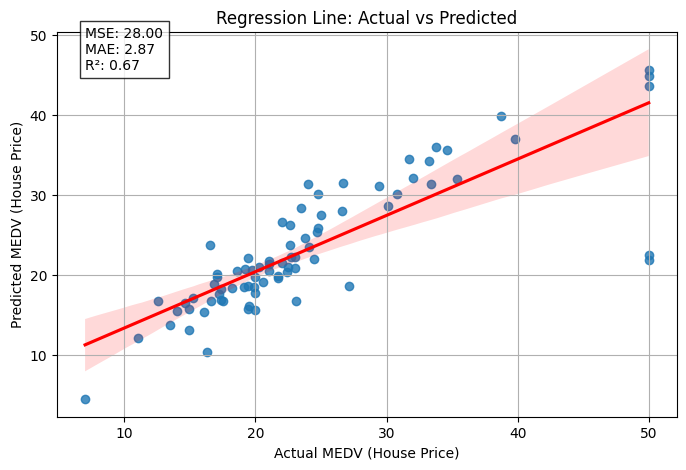

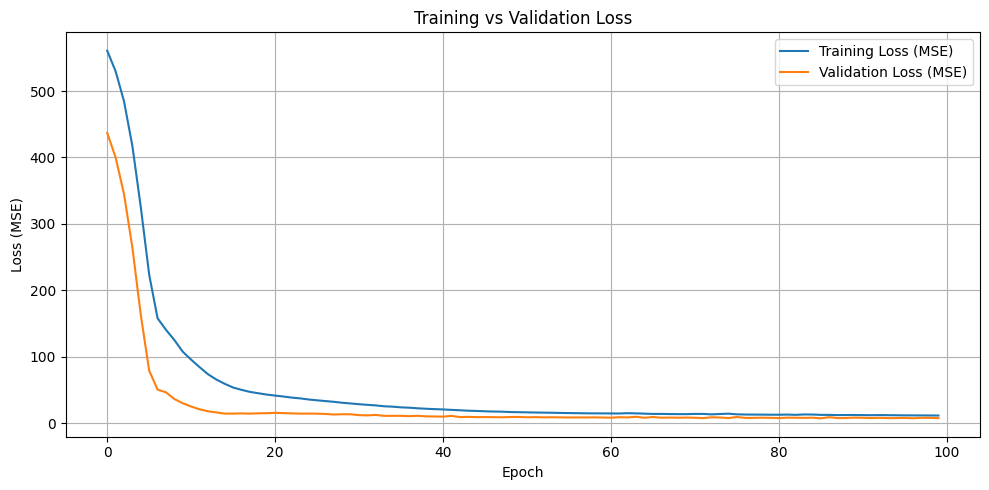

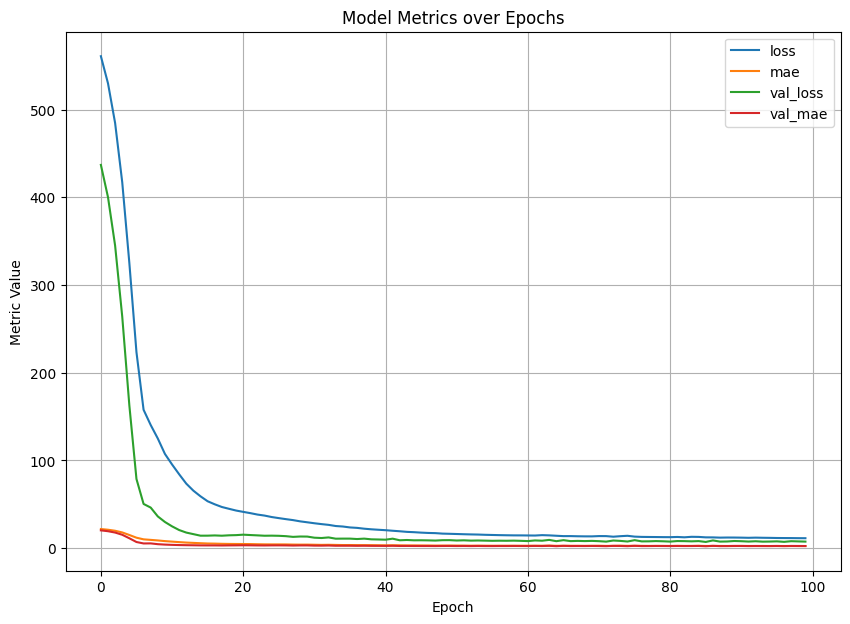

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("boston.csv")
df = df.dropna()

# Split features and target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose=1)

# Predict
y_pred = model.predict(X_test).flatten()

# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R² Score: {r2:.2f}")

# Regression Plot
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title("Regression Line: Actual vs Predicted")
plt.xlabel("Actual MEDV (House Price)")
plt.ylabel("Predicted MEDV (House Price)")
plt.grid(True)

# Annotate metrics on the plot
plt.text(min(y_test), max(y_pred),
         f"MSE: {mse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}",
         fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

# Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# All Metrics Plot
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.title("Model Metrics over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.grid(True)
plt.show()


In [2]:
model.summary(

)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)